# Lab 5: Stage 3 — Results Analysis
This notebook visualizes the performance data collected during manual evaluation. It compares models across different prompting strategies and task categories.

### Key Metrics:
- **Normalized Score**: Raw 0-5 scores scaled to a 0-1 range.
- **Strategy Impact**: How Zero-shot vs. Few-shot vs. CoT affects performance.
- **Task Robustness**: Identifying specific areas where models struggle.

In [13]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data Preparation
Loading annotated CSVs and normalizing scores for cross-comparison.

In [14]:
# Set up paths
ROOT = Path(".").resolve()
OUTPUT_DIR = ROOT / "outputs"
ANNOTATIONS_DIR = ROOT / "annotations"

In [15]:
# Identify and load the latest annotated results
annotation_files = sorted(ANNOTATIONS_DIR.glob('annotations_lab5_experiment_*.csv'))
latest_anno = annotation_files[-1]
df = pd.read_csv(latest_anno)

# Data Cleaning: Keep only scored rows and normalize
df = df[df['score'].notna()].copy()
df['score'] = df['score'].astype(float)
df['normalized_score'] = df['score'] / 5.0 # Translate 0-5 scale to 0.0-1.0

In [16]:
# Aggregate metrics
agg_metrics = df.groupby(['task_id', 'task_name', 'model', 'strategy']).agg(
    avg_score=('normalized_score', 'mean'),
    n=('score', 'size')
).reset_index()

### 2. Comparative Visualization
Generating charts to compare model capabilities and strategy effectiveness.

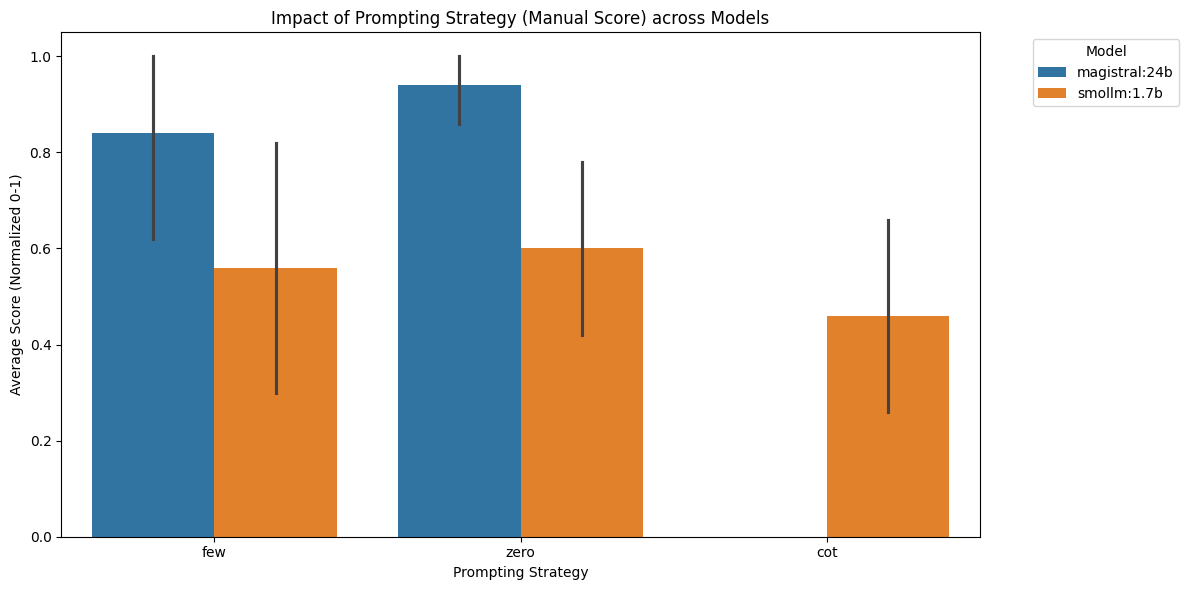

In [17]:
# Visualization: Strategy Effectiveness
plt.figure(figsize=(12, 6))
sns.barplot(data=agg_metrics, x='strategy', y='avg_score', hue='model')
plt.title('Impact of Prompting Strategy (Manual Score) across Models')
plt.ylabel('Average Score (Normalized 0-1)')
plt.xlabel('Prompting Strategy')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "strategy_comparison_manual.png")
plt.show()

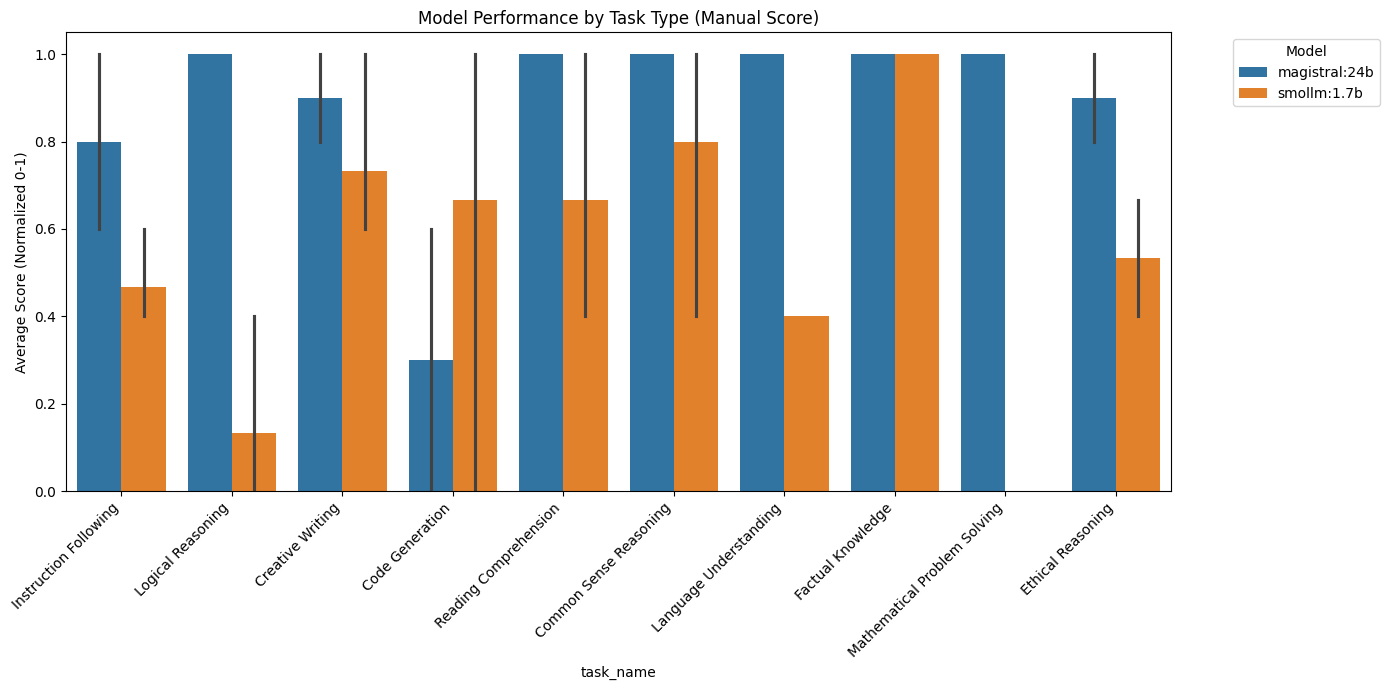

In [18]:
# Visualization: Per-Task Performance
plt.figure(figsize=(14, 7))
sns.barplot(data=agg_metrics, x='task_name', y='avg_score', hue='model')
plt.title('Model Performance by Task Type (Manual Score)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Score (Normalized 0-1)')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "task_performance_manual.png")
plt.show()